In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# CUSTOMERS

1) First of all, we import our dataset about customers. We have the unique identifier for each customer and its age. Furthermore, we know whether he or she is subscribed to the newsletter (1 if yes, 0 if no) and if he or she is part of the special club member.

We have a look to how data are structured, printing the first five items and we get a general idea of the quantity of the data, using the shape function.

In [2]:
customers = pd.read_csv("recsys_customers.csv")
customers.head()

,customer_id,fashion_news,club_member,age
0,0,1,1,44.0
1,1,1,1,33.0
2,2,0,0,29.0
3,3,0,0,21.0
4,4,0,0,23.0


In [3]:
customers.shape

(41253, 4)

2) We want to find the columns that may have NaN values in order to handle them.

In [4]:
customers.isnull().sum()

customer_id       0
fashion_news      0
club_member       0
age             133
dtype: int64

Out of 4 columns, only 1 column has null values, which is age. 

To understand better the weight of these null values on the whole set, we can calculate their weight relative to the lenght of the dataset.

In [5]:
null_percentage= customers['age'].isnull().sum()/ len(customers)
print('The null percentage of age is: ' + str(null_percentage))

The null percentage of age is: 0.0032240079509369014


The percentage of missing values is quite low, around 0.32%. 
At this point we can choose to follow 2 paths:
- Delete all the rows that contain a null value for age.
- We can fill the null cells with the most common values for age.

For the second case, we obtain the mode, which is 26, and we insert it in place of the missing values.

In [6]:
customers.age.mode()

0    26.0
Name: age, dtype: float64

In [7]:
customers['age'] = customers['age'].fillna(customers['age'].mode()[0])

3) As we want our data to be as readable and interpretable as possible, we want to convert the age type from float to integer.

In [8]:
customers["age"] = customers["age"].apply(lambda x: int(x))
customers.head()

,customer_id,fashion_news,club_member,age
0,0,1,1,44
1,1,1,1,33
2,2,0,0,29
3,3,0,0,21
4,4,0,0,23


4) A value we also want to calculate to get a better insight of our data is to divide members by 5 cathegories depending on their age. 

To simplify things, we calculate the maximum and minimum of the age values and then we create our "clusters".

In [9]:
print('The minimal age recorded is: ' + str(min(customers["age"])))
print('The maximal age recorded is: ' + str(max(customers["age"])))


The minimal age recorded is: 16
The maximal age recorded is: 91


What are we doing? We assign each customer to the proper age cathegory adding a column to the initial table.

In [10]:
bins = [15, 30, 45, 60, 70, 92]
groups = ['15-29', '30-44', '45-59','60-79', '80+']

customers['age_group'] = pd.cut(customers.age, bins, labels = groups, include_lowest=True)
customers

,customer_id,fashion_news,club_member,age,age_group
0,0,1,1,44,30-44
1,1,1,1,33,30-44
2,2,0,0,29,15-29
3,3,0,0,21,15-29
4,4,0,0,23,15-29
...,...,...,...,...,...
41248,41248,1,1,33,30-44
41249,41249,0,0,25,15-29
41250,41250,1,1,20,15-29
41251,41251,1,1,29,15-29


After we have cathegorized each customer, we can start to count how many members belong to each cathegory. We do this using the group by function. Obviously the total of the members in each cathegory is equal tot he length of the dataset.

In [11]:
age_group_counts = customers.groupby('age_group').size()
age_group_counts

age_group
15-29    20465
30-44     9971
45-59     9533
60-79     1111
80+        173
dtype: int64

In [12]:
#QUELLO CHE HA FATTO IL PROF --> VIENE LA STESSA COSA
#age_group_counts = Counter(customers['age_group'])
#age_group_counts

5) We are know ready to plot our age groups into a barplot to see the hetereogeneity of our dataset. In fact, as we expected, there are much more younger customers.

In [13]:
age_group_counts_df = pd.DataFrame([age_group_counts]).T.reset_index()
age_group_counts_df.columns = ['Age Group', 'Count']
age_group_counts_df

,Age Group,Count
0,15-29,20465
1,30-44,9971
2,45-59,9533
3,60-79,1111
4,80+,173


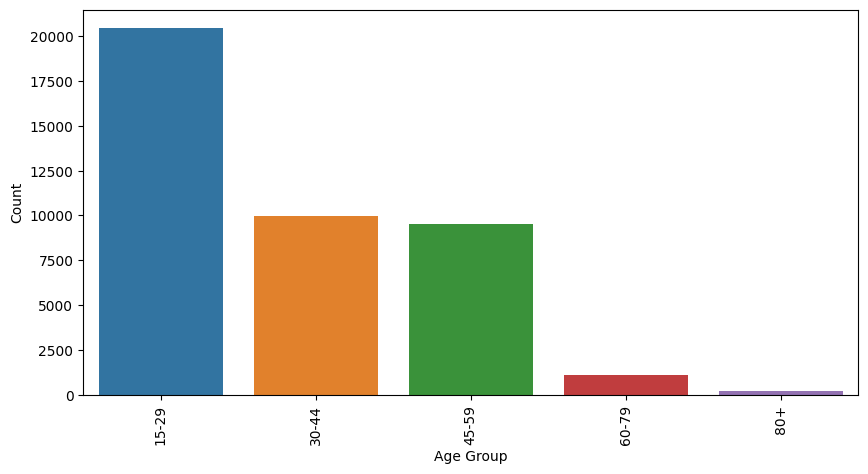

In [14]:
plt.figure(figsize=(10,5))
sns.barplot(x='Age Group', y='Count', data=age_group_counts_df)
plt.xticks(rotation=90)
plt.show()

Actually, it would be better for us also to capture how many people inside each age group have agreed to be part in the member club and how many people have activated the fashion news.

Firstly, looking at the subscription to the club member, we count how many people have agreed to it.

In [15]:
from collections import Counter

club_general = Counter(customers['club_member'])
club_general

Counter({1: 17975, 0: 23278})

In [16]:
#We create a dataframe that contains the two options (being subscribed or not being subscribed)
#and we count all the values for each of them.

In [17]:
club_general_df = pd.DataFrame([club_general]).T.reset_index()
club_general_df.columns = ['Premium Club (1=yes, 0=no)', 'Count']
club_general_df

,"Premium Club (1=yes, 0=no)",Count
0,1,17975
1,0,23278


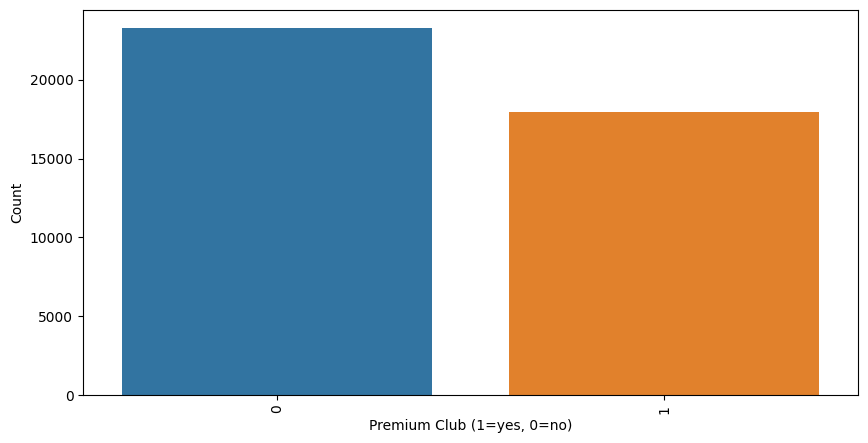

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(x='Premium Club (1=yes, 0=no)', y='Count', data=club_general_df)
plt.xticks(rotation=90)
plt.show()

In [19]:
#We plot the graph of the dataframe but actually this does not tell us a lot because we
#do not know to which group age each customer belongs. 
#Therefore, we might decide to create a more accurate dataframe which always categorizes
#customers in two classes (subscribed or not subscribed) but at the same time, divides 
#the clients also by age group. In this way we can capture more information. For instance
#on average there are more people which are not subscribed to the premium club. However, most 
#of the people who are subscribed are youngsters. For what concerns elderly people, their 
#percentage of influence in the dataset is very small.

In [20]:
club_member_df = customers.groupby(['age_group', 'club_member']).count().reset_index()
club_member_df = club_member_df.drop(columns=['fashion_news', 'age'])
club_member_df.columns = ['age_group', 'club_member', 'count']
club_member_df

,age_group,club_member,count
0,15-29,0,12039
1,15-29,1,8426
2,30-44,0,5764
3,30-44,1,4207
4,45-59,0,4938
5,45-59,1,4595
6,60-79,0,469
7,60-79,1,642
8,80+,0,68
9,80+,1,105


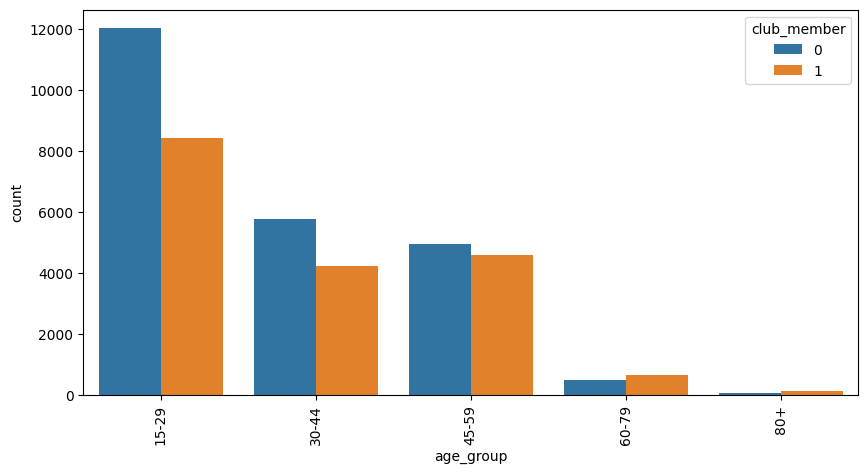

In [21]:
plt.figure(figsize=(10,5))
sns.barplot(x='age_group', y='count', hue='club_member', data=club_member_df)
plt.xticks(rotation=90)
plt.show()

In [22]:
#We can do the same for the subscription to fashion news.

In [23]:
from collections import Counter
fashion_general = Counter(customers['fashion_news'])

fashion_general_df = pd.DataFrame([fashion_general]).T.reset_index()
fashion_general_df.columns = ['Fashion News (1=yes, 0=no)', 'Count']
fashion_general_df

,"Fashion News (1=yes, 0=no)",Count
0,1,18213
1,0,23040


In [24]:
fashion_news_df = customers.groupby(['age_group', 'fashion_news']).count().reset_index()
fashion_news_df = fashion_news_df.drop(columns=['club_member', 'age'])
fashion_news_df.columns = ['age_group', 'fashion_news', 'count']
fashion_news_df

,age_group,fashion_news,count
0,15-29,0,11901
1,15-29,1,8564
2,30-44,0,5710
3,30-44,1,4261
4,45-59,0,4899
5,45-59,1,4634
6,60-79,0,462
7,60-79,1,649
8,80+,0,68
9,80+,1,105


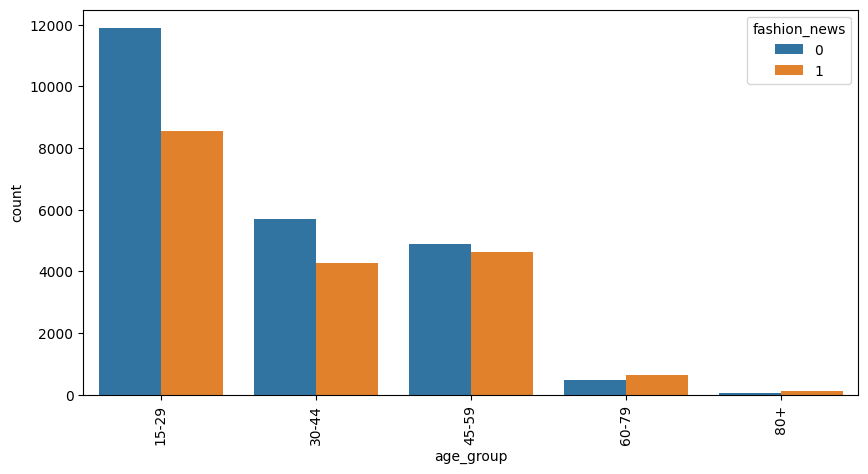

In [25]:
plt.figure(figsize=(10,5))
sns.barplot(x='age_group', y='count', hue='fashion_news', data=fashion_news_df)
plt.xticks(rotation=90)
plt.show()

In [131]:
# What can we easily capture from this graphs? People younger than 60 years old
#are much more into both subscribing to fashion news and getting in the member club.
#However, in general there are still more people which are not into these activities.

# ARTICLES

2) In the second part of our data analysis, we will study the different articles that our company sell, in order to understand when different articles are similiar or different and so when suggest one of them basing on the previous ordered. 
Let's take a look to this dataset:

In [138]:
articles = pd.read_csv("recsys_articles.csv")
articles.head()

,article_id,prod_name,product_type,product_type_name,product_group_name,colour_group,colour_group_name,perceived_colour_value,perceived_colour_value_name,perceived_colour_master,...,department,department_name,index,index_name,index_group,index_group_name,section,section_name,garment_group,garment_group_name
0,0,20 den 1p Stockings,304,Underwear Tights,Socks & Tights,9,Black,4,Dark,5,...,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights
1,1,Shape Up 30 den 1p Tights,273,Leggings/Tights,Garment Lower body,9,Black,4,Dark,5,...,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights
2,2,Support 40 den 1p Tights,304,Underwear Tights,Socks & Tights,9,Black,4,Dark,5,...,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights
3,3,200 den 1p Tights,304,Underwear Tights,Socks & Tights,9,Black,4,Dark,5,...,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights
4,4,Control Top 50 den 1p Tights,273,Leggings/Tights,Garment Lower body,9,Black,4,Dark,5,...,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights


As we can easily see, this dataset has a more complex structure than the one analyzed before, but we can surely ignore some columns:
In fact, a lot of columns give us the same information of another column; this is due to the fact that each category is represented by 2 columns.
For example, we have the variable 'product_type', that is the ID code for a category and then we have 'product_type_name', that is the full name of a category.
Based on this, we can choose some variable to consider and someother to ignore.


As we did for customers, we want to check how many values are null.

In [139]:
articles.isnull().sum()

article_id                      0
prod_name                       0
product_type                    0
product_type_name               0
product_group_name              0
colour_group                    0
colour_group_name               0
perceived_colour_value          0
perceived_colour_value_name     0
perceived_colour_master         0
perceived_colour_master_name    0
department                      0
department_name                 0
index                           0
index_name                      0
index_group                     0
index_group_name                0
section                         0
section_name                    0
garment_group                   0
garment_group_name              0
dtype: int64

Luckily, this time we have zero null values.

Now we can group our articles in different ways, starting from the division in categories.
We want to see how our product are partitioned by their category, and so see how this categories are structured, finding the number of articles for each category:

In [143]:
type_article_count = Counter(articles['product_type_name'])
type_article_count_df = pd.DataFrame([type_article_count]).T.reset_index()
type_article_count_df.columns = ['Type', 'Count']
type_article_count_df.sort_values(by='Count', ascending=False) #We sort the dataframe in order to see the biggest types withot any code

,Type,Count
18,Trousers,972
3,Sweater,635
11,Dress,578
21,Top,422
17,T-shirt,382
...,...,...
30,Braces,1
78,Hairband,1
79,Flat shoes,1
31,Nipple covers,1


From the dataframe, we see that the type of product with more articles inside is the Trouser, with exactly 972 different ones.

Let's see a visual representation:

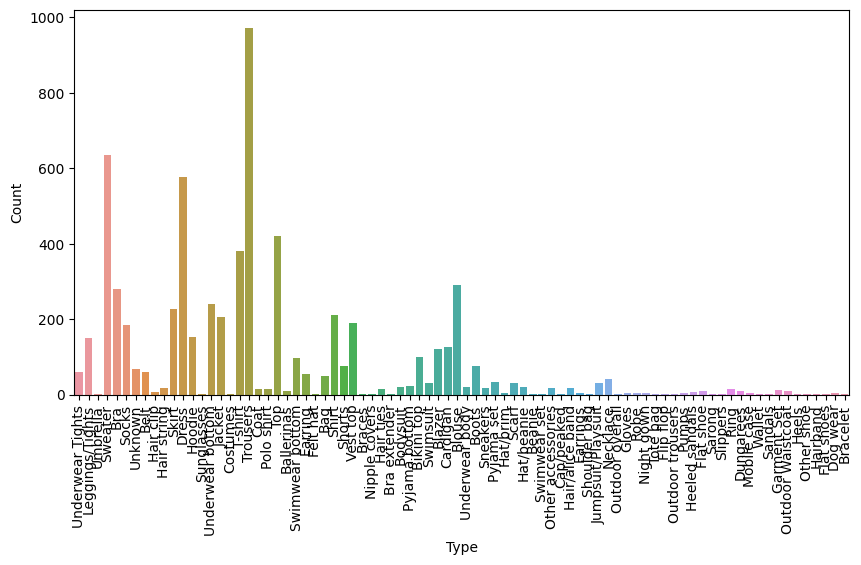

In [144]:
plt.figure(figsize=(10,5))
sns.barplot(x='Type', y='Count', data=type_article_count_df)
plt.xticks(rotation=90)
plt.show()

This plot is useful, but also to caothic (82 categories are too many) so we can regroup our categories (types) in some larger categories (group).

In [145]:
group_article_count = Counter(articles['product_group_name'])
group_article_count_df = pd.DataFrame([group_article_count]).T.reset_index()
group_article_count_df.columns = ['Group', 'Count']
group_article_count_df.sort_values(by='Count', ascending=False)

,Group,Count
3,Garment Upper body,2799
1,Garment Lower body,1428
7,Garment Full body,632
4,Underwear,547
6,Accessories,378
0,Socks & Tights,245
9,Swimwear,233
8,Shoes,135
5,Unknown,67
10,Nightwear,60


This time, we directly see all the classification for groups, where the winner is Garment Upper body, with 2799 different articles.

One more time, the plot:

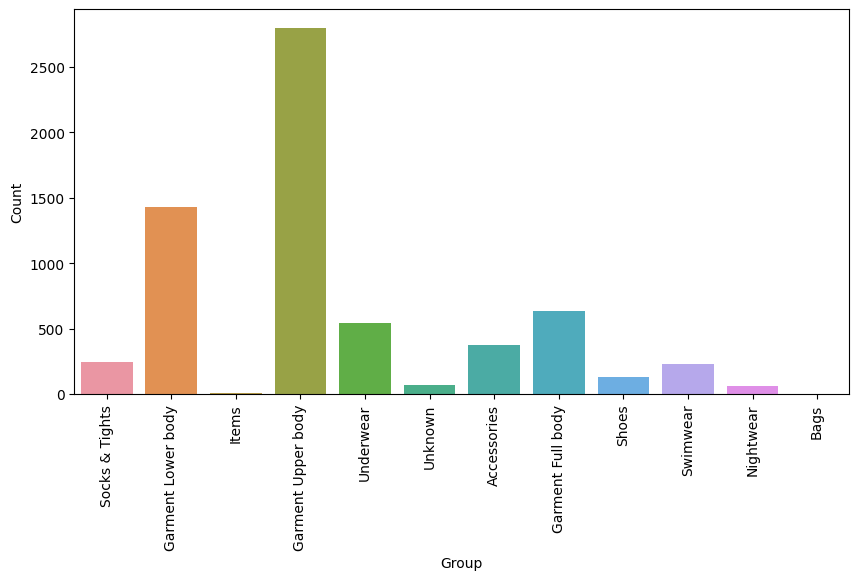

In [125]:
plt.figure(figsize=(10,5))
sns.barplot(x='Group', y='Count', data=group_article_count_df)
plt.xticks(rotation=90)
plt.show()

Now we have a more simpler plot, where we can identify the top categories just by seeing it.

# TRANSACTIONS

In [97]:
transactions = pd.read_csv("recsys_transactions.csv")
transactions.head()

,t_dat,customer_id,article_id
0,2020-09-02,7,599
1,2020-09-02,7,2600
2,2020-09-02,7,2063
3,2020-09-02,7,5188
4,2020-09-02,17,5111


The last dataset we are going to study is "recsys_transactions.csv". Its information are the date of purchase, the customer id and the product id. The same customer can purchase more articles.

To be in do doubt, we check there are Null values that might interfere with our analysis.

In [98]:
transactions.isnull().sum()

t_dat          0
customer_id    0
article_id     0
dtype: int64

# INGLESE PESSIMO, DA RIVEDERE  

This result was not hard to predict.
In fact, giving a look to this dataset, we can see that is based on a relationship between the other 2 so, all the rows are composed by the IDs of an article and and a costumer.
Without one of these 2 values, the row will give us zero relevant informations and so would be unuseful to process it.



We would like to see how many purchases has done each customer. We create a dataframe with 2 columns: on one side the customer ID and on the other the number of purchases each customer has made.

In [99]:
from collections import Counter
customer_transactions_count = Counter(transactions['customer_id'])
#transactions.groupby('customer_id').size()
#outputs a long dictionary with key the id of the customer and value the number of purchases he or she has made

In [100]:
customer_transactions_count_df = pd.DataFrame([customer_transactions_count]).T.reset_index()
customer_transactions_count_df.columns = ['Customer ID', 'Number of Transactions']
#customer_transactions_count_df= customer_transactions_count_df.sort_values(by='Customer ID', ascending=True).reset_index()
customer_transactions_count_df.head()

,Customer ID,Number of Transactions
0,7,20
1,17,7
2,20,8
3,56,10
4,69,12


The customer who has ultimated the highest amount of purchases is:

In [101]:
max_user_transaction = customer_transactions_count_df['Number of Transactions'].max() #find the max number of transactions by a costumer
user_list = []
for i in customer_transactions_count.keys():
    if customer_transactions_count[i] == max_user_transaction:
        user_list.append(i)
print("The users with the highest amount of purchase are: " + str(user_list) + '\nWith number of transactions: ' + str(max_user_transaction))

The users with the highest amount of purchase are: [9197]
With number of transactions: 104


We used a list to map the users because we could have found a tie (2 different users did the same number of purchase) and in order to not lose information, we pick everyone.

It is also interesting to see everything on the other way around, so how many times each item has been bought by customers.

In [102]:
article_transactions_count = Counter(transactions['article_id'])

In [103]:
article_transactions_count_df = pd.DataFrame([article_transactions_count]).T.reset_index()
article_transactions_count_df.columns = ['Article ID', 'Number of Transactions']
article_transactions_count_df.head()

,Article ID,Number of Transactions
0,599,147
1,2600,56
2,2063,407
3,5188,59
4,5111,272


Again, just to be sure, we check that there is no product thta has never been bought.

In [106]:
article_transactions_count_df[article_transactions_count_df['Number of Transactions'] == '0']

,Article ID,Number of Transactions


In [105]:
max_article_transaction =article_transactions_count_df['Number of Transactions'].max() #find the max number of transactions by a costumer
article_list = []
for i in article_transactions_count.keys():
    if article_transactions_count[i] == max_article_transaction:
        article_list.append(i)
print("The users with the highest amount of purchase are: " + str(article_list) + '\nWith number of transactions: ' + str(max_article_transaction))

The users with the highest amount of purchase are: [1419]
With number of transactions: 1045


Same as before, we used a list to see the most wanted articles.
This time, we can access to more information than the case studied before.
In fact, while for the customers we can access to a restricted range of information (lot of them are sensitive data) for products we can see more information useful to market strategies.
So, let'see what is this id 1419:

In [107]:
articles.loc[articles['article_id'] == 1419]

,article_id,prod_name,product_type,product_type_name,product_group_name,colour_group,colour_group_name,perceived_colour_value,perceived_colour_value_name,perceived_colour_master,...,department,department_name,index,index_name,index_group,index_group_name,section,section_name,garment_group,garment_group_name
1419,1419,Pluto RW slacks (1),272,Trousers,Garment Lower body,9,Black,4,Dark,5,...,1722,Trouser,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1009,Trousers


This row gives us a lot of information, maybe too many.
In fact, in our opinion, is better to focus on category in spite of single products, because we can have a more accurate analysis basing on a bigger radius of articles, avoiding in this way some outliers.

In [ ]:
#Creare un dataframe transaction che ha al posto di article_id l'id della categoria che va preso dal file article